CRIME DATA ANALYSIS WITH PYTHON 

Project Overview (Markdown Cell)

Title: Boston Crime Data Analysis Using Python

Goal: To analyze patterns, trends, and hotspots in crime reports, and derive actionable insights for decision-making or public awareness.

**LOADING THE DATASET AND INITIAL EXPLORATION**

In [2]:
#Import the necessary libraries

import pandas as pd
import numpy as np

In [25]:
#load dataset
df= pd.read_csv("data/crime.csv", encoding = 'latin1')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [26]:
sample_df = df

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   YEAR                 319073 non-null  int64  
 9   MONTH                319073 non-null  int64  
 10  DAY_OF_WEEK          319073 non-null  object 
 11  HOUR                 319073 non-null  int64  
 12  UCR_PART             318983 non-null  object 
 13  STREET               308202 non-null  object 
 14  Lat                  299074 non-null  float64
 15  Long             

In [5]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


WHICH CRIME HAD OCCURED THE MOST IN A YEAR AND WHAT CRIME OCCCURED THE LEAST IN A YEAR?
AT WHAT HOURS HAS THE MOST CRIMES BEEN COMMITTED AND WHAT HOURS HAS THE LEAST?
WHAT MONTH HAS THE MOST CRIMES AND THE LEAST?



In [6]:
# Convert OCCURRED_ON_DATE to datetime format
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'], errors='coerce')

# Check for any issues with conversion
df['OCCURRED_ON_DATE'].isna().sum()
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [7]:
# Fill missing values in 'SHOOTING' with 0 (no shooting), and encode as binary (1 if yes)
df['SHOOTING'] = df['SHOOTING'].fillna(0)
df['SHOOTING'] = df['SHOOTING'].apply(lambda x: 1 if x == 'Y' else 0)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
df['SHOOTING'].unique()

array([0, 1], dtype=int64)

In [9]:
# Drop Lat, Long, and Location if not used for now 
df.drop(columns=['Lat', 'Long', 'Location'], inplace=True)


In [10]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST
1,I182070943,1402,Vandalism,VANDALISM,C11,347,0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST



🧭 3.2 Spatial Analysis:
Top 10 crime-prone districts

Top 10 streets

(Optional advanced) Use Folium to plot crime incidents on a map

🚔 3.3 Offense Type Analysis:
Top Offense Groups

Distribution by UCR_PART (One, Two, Three)

Shooting vs Non-shooting breakdown by Offense Group

**🔍 3. Exploratory Data Analysis (EDA)**

📆 3.1 Temporal Analysis — "When do crimes happen?"
📈 Crimes by Year

<Axes: title={'center': 'CRIMES PER YEAR'}, xlabel='YEAR'>

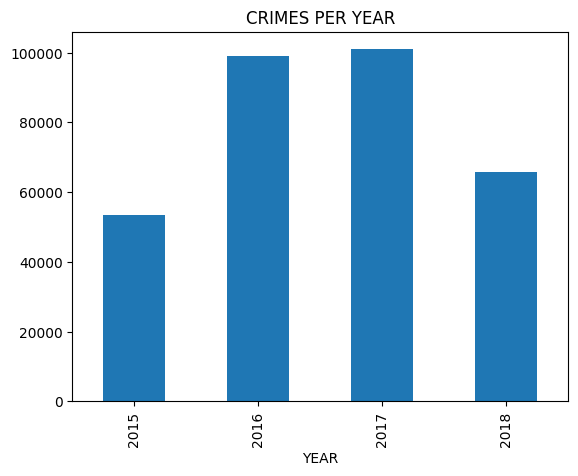

In [11]:
# Crimes per Year
df['YEAR'].value_counts().sort_index().plot(kind='bar', title='CRIMES PER YEAR')



📆 3.1 Temporal Analysis — "**When do crimes happen?**"
📈 Now let's do it by Crimes by month, week and hour

<Axes: title={'center': 'CRIMES PER MONTH'}, xlabel='MONTH'>

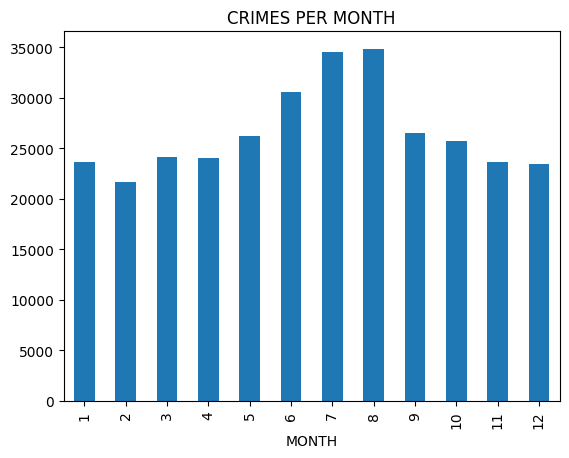

In [12]:
# Crimes per Month
df['MONTH'].value_counts().sort_index().plot(kind='bar', title='CRIMES PER MONTH')



<Axes: title={'center': 'Crimes by Day of the Week'}, xlabel='DAY_OF_WEEK'>

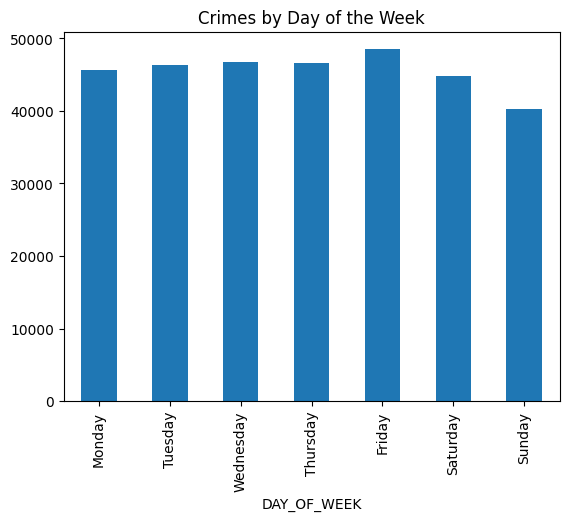

In [13]:
# Crimes per Day of Week
df['DAY_OF_WEEK'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).plot(kind='bar', title='Crimes by Day of the Week')



<Axes: title={'center': 'Crimes per Hour of the Day'}, xlabel='HOUR'>

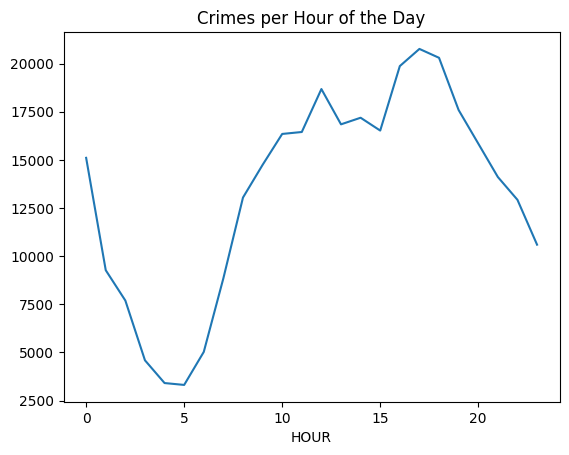

In [14]:
# Crimes per Hour
df['HOUR'].value_counts().sort_index().plot(kind='line', title='Crimes per Hour of the Day')

In [36]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST
1,I182070943,1402,Vandalism,VANDALISM,C11,347,0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST


Text(0, 0.5, 'Number of Crimes')

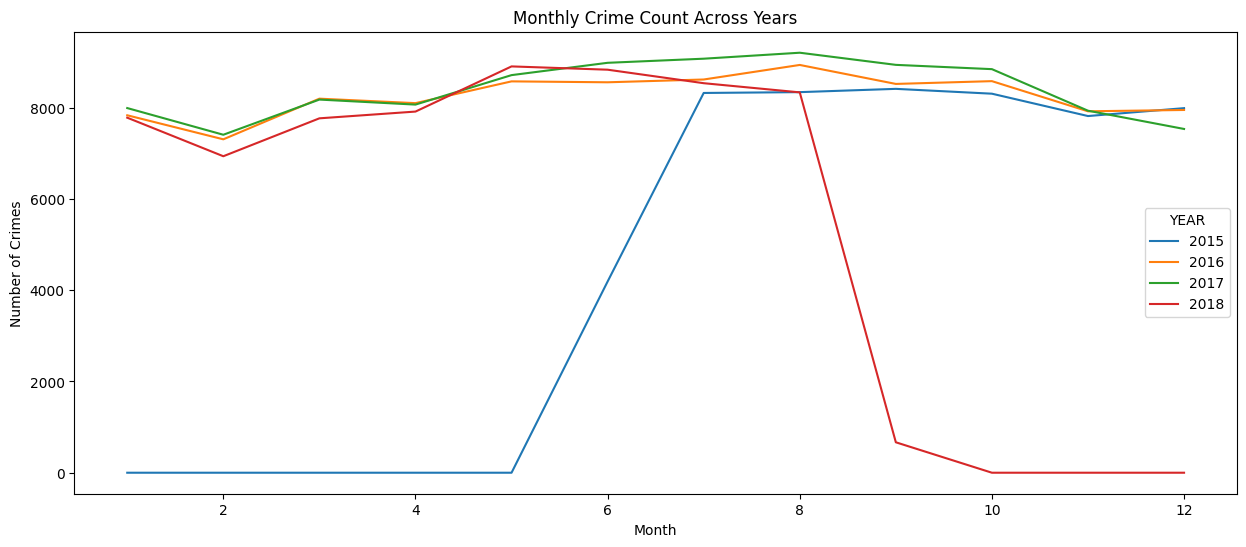

In [16]:
import matplotlib.pyplot as plt
# Group by Year and Month
monthly = df.groupby(['YEAR', 'MONTH']).size().unstack(fill_value=0)

# Plot
monthly.T.plot(figsize=(15, 6), title='Monthly Crime Count Across Years')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

In [17]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,0,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST
1,I182070943,1402,Vandalism,VANDALISM,C11,347,0,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,0,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,0,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,0,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST


🔥 Heatmap: Hour vs Day of Week

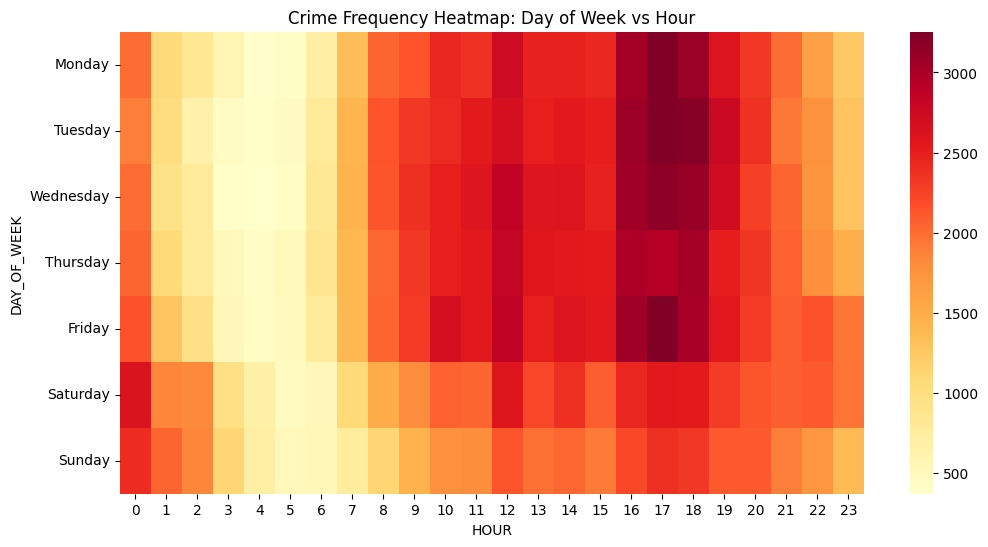

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pivot table for heatmap
pivot = df.pivot_table(index='DAY_OF_WEEK', columns='HOUR', values='INCIDENT_NUMBER', aggfunc='count')
pivot = pivot.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Crime Frequency Heatmap: Day of Week vs Hour")
plt.show()


📊 Bar Chart: Crime Count by Month and Year

🧭 3.2 Spatial Analysis — "Where do crimes happen?"
🚨 Top 10 Crime-Prone Districts

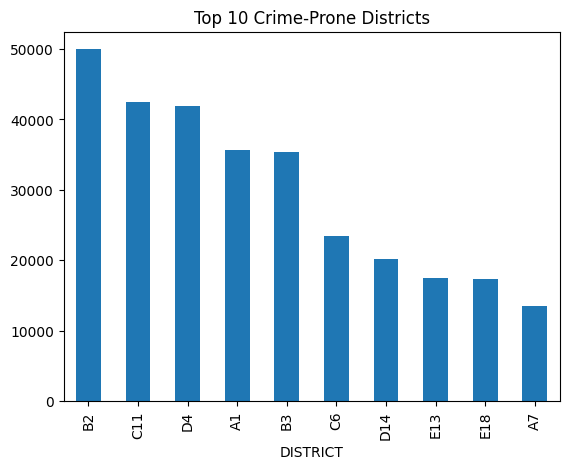

In [19]:
df['DISTRICT'].value_counts().head(10).plot(kind='bar', title='Top 10 Crime-Prone Districts')
plt.show()

```python
PLOT CRIMES ON A MAP
```

In [23]:
import folium
from folium.plugins import HeatMap

In [28]:
# Sample a smaller portion if data is large
sample_df = df.dropna(subset=['Lat', 'Long']).sample(1000)

# Initialize map
m = folium.Map(location=[42.35, -71.08], zoom_start=12)
HeatMap(data=sample_df[['Lat', 'Long']]).add_to(m)

m  # In Jupyter, this will render the map
# Save the map to an HTML file if needed
m.save("crime_heatmap.html")

**OFFENSE TYPE ANALYSIS**
```python
WHAT TYPE OF CRIMES ARE COMMITTED?
```

<Axes: title={'center': 'Top 10 Offense Groups'}, ylabel='OFFENSE_CODE_GROUP'>

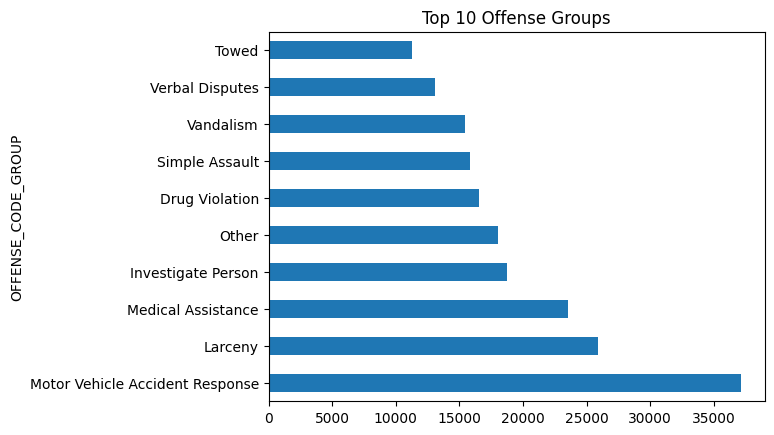

In [20]:
df['OFFENSE_CODE_GROUP'].value_counts().head(10).plot(kind='barh', title='Top 10 Offense Groups')
